# STUDENT MARKS PREDICTION

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load  Dataset

In [2]:
df=pd.read_csv("Dataset/Student_Marks.csv")

In [3]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [7]:
df.shape

(100, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.isnull().sum()  # There are no null values in any column

number_courses    0
time_study        0
Marks             0
dtype: int64

In [6]:
df['number_courses'].value_counts()

3    22
4    21
8    16
6    16
7    15
5    10
Name: number_courses, dtype: int64

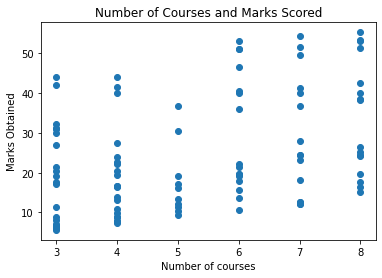

In [17]:
plt.scatter(x=df['number_courses'],y=df['Marks'])
plt.title("Number of Courses and Marks Scored")
plt.xlabel("Number of courses")
plt.ylabel("Marks Obtained")
plt.show()

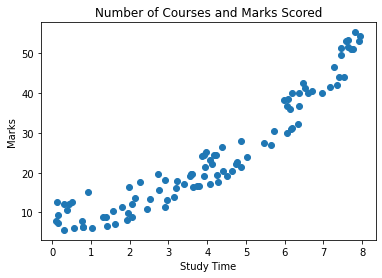

In [18]:
plt.scatter(x=df['time_study'],y=df['Marks'])
plt.title("Number of Courses and Marks Scored")
plt.xlabel("Study Time")
plt.ylabel("Marks")
plt.show()

There is a linear relationship between the time studied and the marks obtained. This means the more time students spend studying, the better they can score.

In [27]:
correlation=df.corr()
correlation

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


So the time_studied column is more correlated with the marks column than the other column.

# Model Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
X=df.drop(columns=["Marks"])
y=df['Marks']

In [33]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    
    

In [34]:
np.argmax(scores)

529

In [35]:
scores[np.argmax(scores)]

0.9641769729016336

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(r2_score(y_test,y_pred)*100)

96.41769729016336


In [39]:
import pickle

In [40]:
pickle.dump(lr,open("studentmarks.pkl",'wb'))

In [42]:
model=pickle.load(open("studentmarks.pkl",'rb'))

In [43]:
model.predict(X_test)

array([39.55262007,  7.53431778,  9.07856838, 48.8681364 ,  9.80642066,
       28.65673975, 10.98897895, 10.6419926 , 19.85506355, 23.37189931,
       47.05905429, 44.84689218, 18.12428918, 32.34874404, 13.5417362 ,
       11.93946839, 37.36043822, 21.47842853, 40.38068389, 30.76149246])

In [44]:
X_test.head()

,number_courses,time_study
89,7,6.376
29,4,1.299
31,3,1.923
4,8,7.811
45,3,2.061


In [45]:
y_test.head()

89    40.024
29     8.837
31     8.100
4     55.299
45     8.924
Name: Marks, dtype: float64

In [48]:
model.predict([[7,6.376]])[0]

39.55262007147356

In [49]:
model.predict([[3,1.923]])[0]

9.07856838375293

In [8]:
a=22.56576876765
print(int(a))

22
